In [1]:
# The following three observations were made based on a review of the Pymaceuticals study data:
# 1. Capomulin (along with Ramicane) yielded the lowest tumor volume across all drugs tested.
# 2. A line plot of time point versus tumor volume for a single mouse treated with Capomulin shows a significant
#    reduction in tumor volume over a 45-day period.
# 3. The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84,
#    reflecting a strong correlation between these two factors. 

In [2]:
## DEPENDENCIES
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

# study data files
mouse_metadata = "../Resources/Mouse_metadata.csv"
study_results = "../Resources/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
# combine the data into a single dataset 
# display the data table for preview
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# check number of mice
df = study_results["Mouse ID"].nunique()
df

249

In [5]:
# getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse = merge_table.loc[merge_table.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [6]:
# optional: get all the data for the duplicate mouse ID
duplicated_mice = merge_table.loc[merge_table['Mouse ID']=='g989']
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# create a clean dataframe by dropping the duplicate mouse by its ID
clean_df = merge_table[merge_table['Mouse ID']!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
df = clean_df["Mouse ID"].nunique()
df

248

In [9]:
## SUMMARY STATISTICS
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
## BAR PLOTS
# generate a bar plot showing number of data points per treatment regimen using pandas
grouped_df = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()
# filter df down to columns to include in chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# set index to be "drug regimen" so they will serve as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

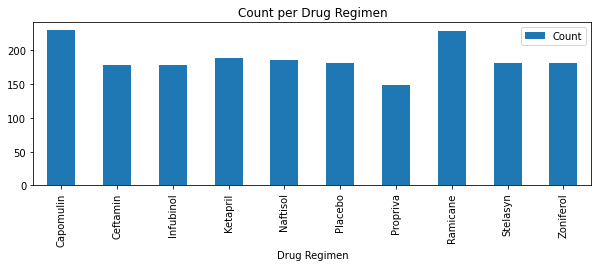

<Figure size 432x288 with 0 Axes>

In [11]:
# use DataFrame.plot() in order to create bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# set title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

In [12]:
## BAR PLOT USING PYPLOT
import matplotlib.pyplot as plt

# generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [13]:
# convert regimen count into a list
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [14]:
x_axis = np.arange(len(regimen_count))

<BarContainer object of 10 artists>

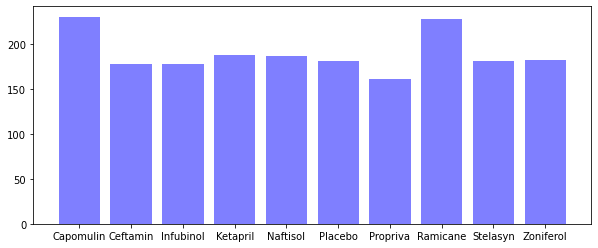

In [15]:
# define x-axis
x_axis = drug_regimens
# create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

In [16]:
## PIE PLOTS
# generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [17]:
# filter the data frame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


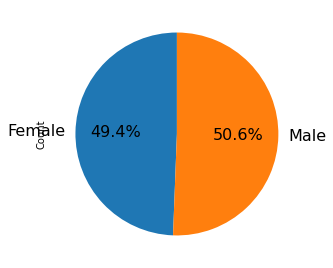

In [18]:
# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [19]:
plt.clf()
plt.cla()
plt.close()

In [20]:
## PIE PLOT USING PYPLOT
import matplotlib.pyplot as plt
# generate a pie plot showing the distribution of female versus male mice using pyplot
# convert Columns into lists
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

In [21]:
# labels for the sections of our pie chart
labels = ["Females", "Males"]

In [22]:
# color each section of pie chart
colors = ["pink", "blue"]

In [23]:
# tell matplotlib to seperate the python section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x1953d781640>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

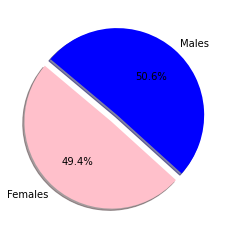

In [24]:
# create the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [25]:
## QUARTILES, OUTLIERS, AND BOXPLOTS
# calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# start by getting the last (greatest) timepoint for each mouse
max_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [27]:
# merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df2 = pd.merge(max_df,clean_df,on=['Mouse ID','Timepoint'])
merge_df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# select data for Capomulin regimen and reset index
cap_data_df = merge_df2[merge_df2['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,19,b128,45,Capomulin,Female,9,22,38.982878,2
1,24,b742,45,Capomulin,Male,7,21,38.939633,0
2,61,f966,20,Capomulin,Male,16,17,30.485985,0
3,64,g288,45,Capomulin,Male,3,19,37.074024,1
4,66,g316,45,Capomulin,Female,22,22,40.159220,2


In [29]:
# convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [30]:
# if the data is in a dataframe, use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"The interquartile range of temperatures is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The the median of temperatures is: 38.125164399999996 
The interquartile range of temperatures is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


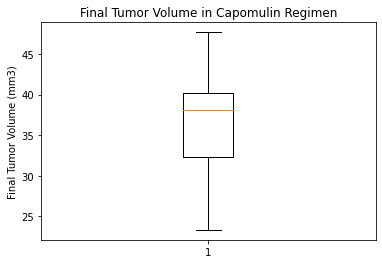

In [31]:
# example outlier plot of final total volume
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [32]:
# select data for Ramicane regimen and reset index
ram_data_df = merge_df2[merge_df2['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,6,a411,45,Ramicane,Male,3,22,38.407618,1
1,7,a444,45,Ramicane,Female,10,25,43.047543,0
2,10,a520,45,Ramicane,Male,13,21,38.810366,1
3,12,a644,45,Ramicane,Female,7,17,32.978522,1
4,33,c458,30,Ramicane,Female,23,20,38.342008,2


In [33]:
# convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [34]:
# if data is in a dataframe, use pandas to give quartile calculations
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


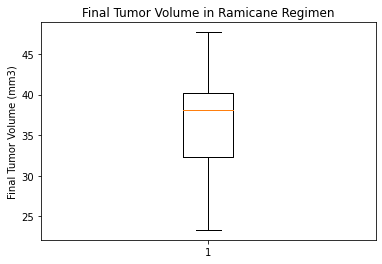

In [35]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [36]:
# select data for Infubinol regimen and reset index
inf_data_df = merge_df2[merge_df2['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,11,a577,30,Infubinol,Female,6,25,57.031862,2
3,13,a685,45,Infubinol,Male,8,30,66.083066,3
4,27,c139,45,Infubinol,Male,11,28,72.226731,2


In [37]:
# convert column "Tumor Volume" of the Infubinol regimen into a dataframe object
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

0     36.321346
1     45.699331
2     46.250112
3     47.010364
4     50.005138
5     51.542431
6     54.048608
7     54.656549
8     55.629428
9     55.650681
10    57.031862
11    58.268442
12    60.165180
13    60.918767
14    60.969711
15    62.117279
16    62.435404
17    62.754451
18    65.525743
19    66.083066
20    66.196912
21    67.289621
22    67.685569
23    67.973419
24    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [38]:
# if the data is in a dataframe, we use pandas to give quartile calculations
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


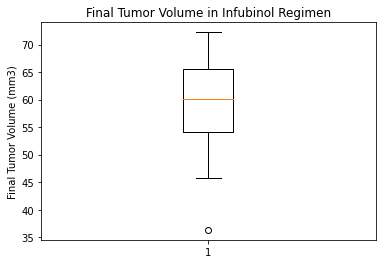

In [39]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

In [40]:
# select data for Ceftamin regimen and reset index
cef_data_df = merge_df2[merge_df2['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,3,a275,45,Ceftamin,Female,20,28,62.999356,3
1,21,b447,0,Ceftamin,Male,2,30,45.000000,0
2,22,b487,25,Ceftamin,Female,6,28,56.057749,1
3,25,b759,30,Ceftamin,Female,12,25,55.742829,1
4,58,f436,15,Ceftamin,Female,3,25,48.722078,2


In [41]:
# convert column "Tumor Volume" of the Ceftamin regimen into a dataframe object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [42]:
# if the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


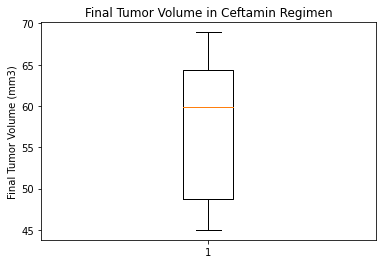

In [43]:
# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [44]:
## LINE AND SCATTER PLOTS
# generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# create a new DataFrame that looks into Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [45]:
# select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


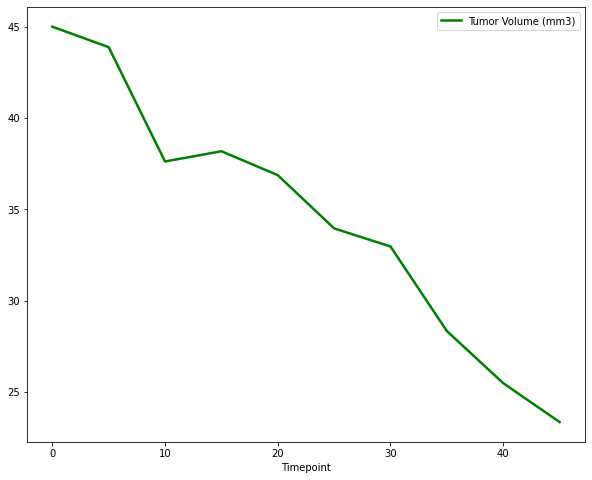

In [46]:
# selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# capomulin_df.index
# reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

In [47]:
## SCATTER PLOT
# generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [48]:
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [49]:
# selecting only three columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [50]:
# calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [51]:
# rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [52]:
# set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

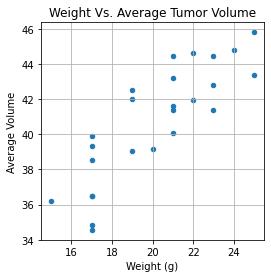

In [53]:
# generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [54]:
plt.clf()
plt.cla()
plt.close()

In [55]:
## CORRELATION COEFFICIENT AND LINEAR REGRESSION MODEL
# calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt

In [56]:
# calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


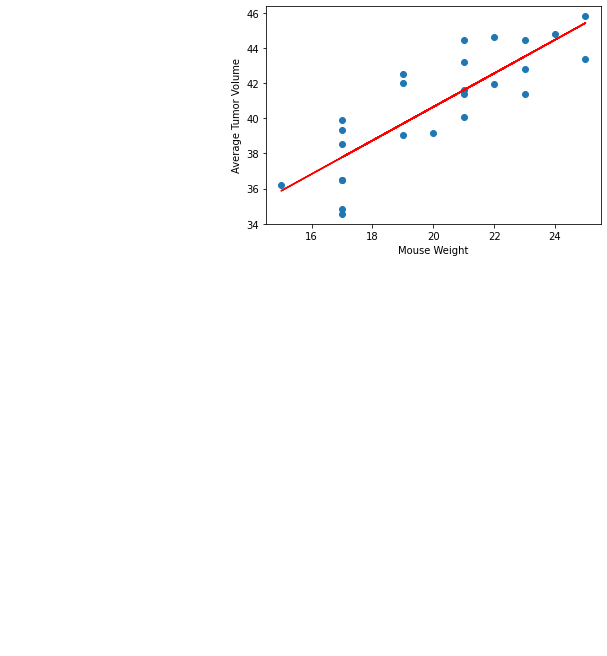

In [57]:
# add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()